## Miner's fee revenue from 2009 to 2020

In [1]:
import pandas as pd
from math import floor
from tqdm.notebook import tqdm
from utils_plot import *
from matplotlib.ticker import MultipleLocator

In [2]:
def process_tx(tx):
    data = dict()
    data['txid'] = tx['txid']
    data['block_height'] = tx['block_height']
    data['vout'] = round(sum(map(lambda x: x['value'], tx['tx_json']['vout'])), 8)
    return data

def get_reward(block_height):
    return 50.0 * 2**-floor((block_height/210000))

## Loading data

In [3]:
df = pd.read_csv('data/rewards.csv.gz', sep=';', compression='gzip', parse_dates=['datetime'])
df.set_index('datetime', inplace=True)
df['fees'] = df['vout'] - df['reward']
df['fees_reward_fraction'] = df['fees']/df['vout']
df.loc[df['fees_reward_fraction'] < 0, 'fees_reward_fraction'] = 0

In [4]:
df.groupby(df.index.year).fees_reward_fraction.describe()

,count,mean,std,min,25%,50%,75%,max
datetime,,,,,,,,
2009,32489.0,0.00000172,0.00021793,0.0,0.00000000,0.00000000,0.00000000,0.03864641
2010,67920.0,0.00001246,0.00067524,0.0,0.00000000,0.00000000,0.00000000,0.11832128
2011,59627.0,0.00094068,0.00570572,0.0,0.00000000,0.00023994,0.00091915,0.77461893
2012,54526.0,0.00270338,0.00893228,0.0,0.00020996,0.00088122,0.00302232,0.70590484
2013,63433.0,0.00867270,0.02069343,0.0,0.00197609,0.00527827,0.01093901,0.88900038
2014,58865.0,0.00310231,0.00499062,0.0,0.00096622,0.00229388,0.00436553,0.54695455
2015,54321.0,0.00590296,0.00724490,0.0,0.00190576,0.00446834,0.00835988,0.77520755
2016,54851.0,0.02478781,0.02124726,0.0,0.00866995,0.01777982,0.03837456,0.92101923
2017,55928.0,0.11769274,0.07729091,0.0,0.06330763,0.10488417,0.15576453,0.86436242


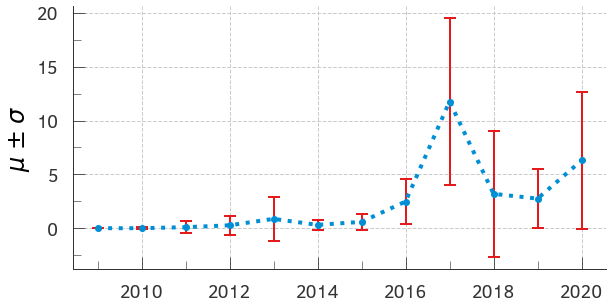

In [5]:
data = 100 * df.groupby(df.index.year).fees_reward_fraction.agg(['mean', 'std'])
ax = data.plot(ls=':', marker='o', yerr='std', 
                          capsize=6, capthick=2, elinewidth=2, 
                          ecolor=colors['red'], legend=False)
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(2.5))
ax.set_xlabel('')
ax.set_ylabel(r"""$\mu$ $\pm$ $\sigma$""")
plt.savefig('../images/fee-revenue.png', bbox_inches='tight')